In [39]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
import re
import pickle as pkl

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
df=df.dropna()

In [5]:
X=df.drop('label',axis=1)

In [6]:
y=df['label']

In [7]:
df.shape

(18285, 5)

In [8]:
df.shape

(18285, 5)

In [9]:
messages=df.copy()

In [10]:
messages=messages.reset_index()

In [11]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [12]:
lm=WordNetLemmatizer()
corpus=[]

In [13]:
for i in range(len(messages)):
    message=re.sub('[^a-zA-Z]',' ',messages['title'][i])
    message=message.lower()
    message=message.split()
    
    message=[lm.lemmatize(word) for word in message if word not in set(stopwords.words('english'))]
    message=' '.join(message)
    corpus.append(message)

In [14]:
corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [15]:
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [18]:
pkl.dump(cv, open('cv-transform.pkl', 'wb'))

In [19]:
X.shape

(18285, 5000)

In [20]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [22]:
cv.get_feature_names()[:20]

C:\Users\viral\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abandoned',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abroad',
 'absolutely',
 'absurd',
 'abuse',
 'abuse new',
 'abuse new york',
 'academy',
 'accept',
 'accepting',
 'access',
 'access pipeline',
 'access pipeline protest']

In [23]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
count_df=pd.DataFrame(X_train,columns=cv.get_feature_names())

In [25]:
count_df

,abandon,abandoned,abc,abc news,abe,abedin,able,abortion,abroad,absolutely,...,zealand,zero,zika,zika virus,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [27]:
mlnb=MultinomialNB()

In [28]:
mlnb.fit(count_df,y_train)

MultinomialNB()

In [29]:
y_pred=mlnb.predict(pd.DataFrame(X_test,columns=cv.get_feature_names()))

C:\Users\viral\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
accuracy_score(y_test,y_pred)

0.9037550127597521

In [33]:
filename = 'Fake-News-mnb-model.pkl'
pkl.dump(mlnb, open(filename, 'wb'))

<AxesSubplot:>

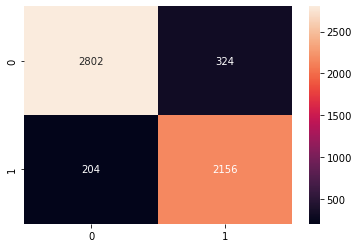

In [34]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [35]:
pac=PassiveAggressiveClassifier()

In [36]:
pac.fit(count_df,y_train)

PassiveAggressiveClassifier()

C:\Users\viral\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0.9234414874225301


<AxesSubplot:>

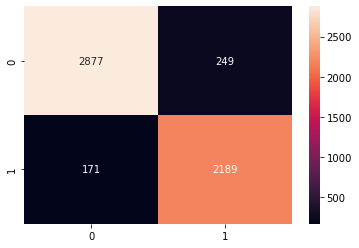

In [37]:
y_pred=pac.predict(pd.DataFrame(X_test,columns=cv.get_feature_names()))
print(accuracy_score(y_test,y_pred))
filename = 'Fake-News-pac-model.pkl'
pkl.dump(pac, open(filename, 'wb'))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [38]:
clf=MultinomialNB()

In [42]:
scores_alpha=[]
for alpha in np.arange(0,2,0.1):
    sub_clf=MultinomialNB(alpha=alpha)
    sub_clf.fit(count_df,y_train)
    y_prd=sub_clf.predict(pd.DataFrame(X_test,columns=cv.get_feature_names()))
    score=accuracy_score(y_test,y_prd)
    scores_alpha.append((score,alpha))
#     print(f'for aplpha {alpha} Accuracy is {score}')
    sorted(scores_alpha)

    

C:\Users\viral\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\viral\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\viral\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\viral\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.w

In [43]:
scores_alpha

[(0.8920889537003281, 0.0),
 (0.9037550127597521, 0.1),
 (0.9041195771053591, 0.2),
 (0.9050309879693766, 0.30000000000000004),
 (0.9050309879693766, 0.4),
 (0.9052132701421801, 0.5),
 (0.9046664236237696, 0.6000000000000001),
 (0.9041195771053591, 0.7000000000000001),
 (0.9041195771053591, 0.8),
 (0.9041195771053591, 0.9),
 (0.9037550127597521, 1.0),
 (0.9035727305869486, 1.1),
 (0.9032081662413416, 1.2000000000000002),
 (0.9033904484141451, 1.3),
 (0.9032081662413416, 1.4000000000000001),
 (0.9030258840685381, 1.5),
 (0.9030258840685381, 1.6),
 (0.9032081662413416, 1.7000000000000002),
 (0.9022967553773241, 1.8),
 (0.9021144732045207, 1.9000000000000001)]

In [44]:
features_name=cv.get_feature_names_out()

In [45]:
pac.coef_[0]

array([ 0.27276392, -0.02980274, -0.1140438 , ..., -0.07062522,
        0.3079368 ,  0.19492695])

In [46]:
sorted(zip(pac.coef_[0],features_name),reverse=True)[:20]

[(3.729462124342264, 'hispanic'),
 (3.502371747129184, 'fail'),
 (3.293645171989904, 'comment'),
 (3.03406604535348, 'migrant crisis'),
 (2.9807878471465954, 'muslim migrant'),
 (2.974620577468748, 'music'),
 (2.864182123698414, 'hardest'),
 (2.724842074910546, 'invisible'),
 (2.7207427842536918, 'subject'),
 (2.651370925332127, 'iowa'),
 (2.631057694389687, 'dangerous'),
 (2.619718017075903, 'hillary'),
 (2.6196796128408972, 'obama tell'),
 (2.5368421471667393, 'power'),
 (2.536264521157498, 'try'),
 (2.384834804035518, 'breaking'),
 (2.3755974840150778, 'capital'),
 (2.3539364693584024, 'illegals'),
 (2.348810857092595, 'predicted'),
 (2.34302060362879, 'divide')]

In [47]:
sorted(zip(pac.coef_[0],features_name))[:20]

[(-6.838203577591933, 'breitbart'),
 (-3.785545744866868, 'delingpole'),
 (-3.6905622036706394, 'islamist'),
 (-3.382491499912223, 'cpac'),
 (-3.3117337993103493, 'inauguration'),
 (-3.3034945753161775, 'revelation'),
 (-3.2954252205431316, 'town hall'),
 (-3.2428819101127098, 'brought'),
 (-3.183219666246673, 'embassy'),
 (-3.132987376717561, 'chemical attack'),
 (-3.109106653553078, 'cartel'),
 (-3.101222548435771, 'resistance'),
 (-3.078339318030606, 'warn'),
 (-3.022098629308064, 'airline'),
 (-3.015582837509221, 'gorka'),
 (-2.9437606302528954, 'baldwin'),
 (-2.9280981436330147, 'steven'),
 (-2.869053655882631, 'replaced'),
 (-2.8375490416186775, 'virgil'),
 (-2.8364792255562836, 'hillary clinton')]